# Обучение без учителя

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [99]:
# Импортируйте библиотеки pandas, numpy и matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
import warnings 
warnings.filterwarnings('ignore')

In [101]:
# Импортируем необходимые библиотеки для обучени и предсказания
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [102]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn
boston = load_boston()

In [103]:
# Создайте датафреймы X и y из этих данных
# Датафрейм с признаками недвижимости
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# Датафрейм с целевой переменой - цена на недвижимость
y = pd.DataFrame(boston.target, columns=['price'])

In [104]:
# Выведем первые записи датафрейма с признаками
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [105]:
# Выведем информацию о датафрейме с признаками, проверим есть ли пропуски 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [106]:
# Выведем первые записи датафрейма с ценой
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [107]:
# Выведем также информацию и о датафрейме с ценой
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [108]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split 
# так, чтобы размер тестовой выборки составлял 20% от всех данных, и random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Масштабируйте данные с помощью StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [110]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [111]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [112]:
# Настроим отображение графиков
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

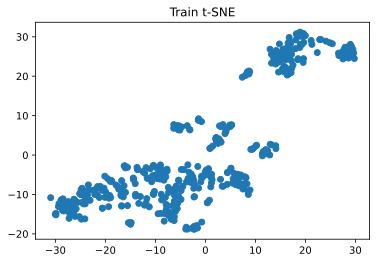

In [113]:
# Постройте диаграмму рассеяния на этих данных
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Train t-SNE')
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [114]:
from sklearn.cluster import KMeans

In [115]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

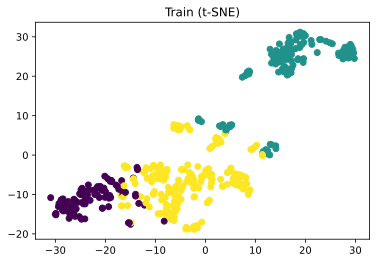

In [116]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
# и раскрасьте точки из разных кластеров разными цветами
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('Train (t-SNE)')
plt.show()

In [117]:
# Вычислите средние значения price и CRIM в разных кластерах
for idx in range(3):
    mean_price = y_train.loc[labels_train == idx, 'price'].mean()
    mean_crim = X_train.loc[labels_train == idx, 'CRIM'].mean()
    print(f'Кластер {idx}:tprice = {mean_price},\tCRIM = {mean_crim}')

Кластер 0:tprice = 27.78837209302326,	CRIM = 0.07356558139534884
Кластер 1:tprice = 16.165354330708663,	CRIM = 10.797028425196851
Кластер 2:tprice = 24.958115183246072,	CRIM = 0.4216602094240837


In [118]:
# Функция для отрисовки гистограмм
def draw_hist(df, param_name, labels, y_log=False):
    for idx in range(3):
        plt.hist(df.loc[labels == idx, param_name], bins=20, density=True, alpha=0.5, label=f'Кластер {idx}')
    
    # Легенда     
    plt.legend()
    # Название оси x     
    plt.xlabel(param_name)
    
    # При необходимости включаем log-mode для оси y     
    if y_log:
        plt.yscale(value='log')
    
    plt.show()

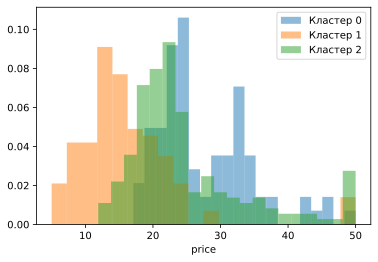

In [119]:
# Гистограмма для параметра price тренировочной выборки
draw_hist(y_train, 'price', labels_train)

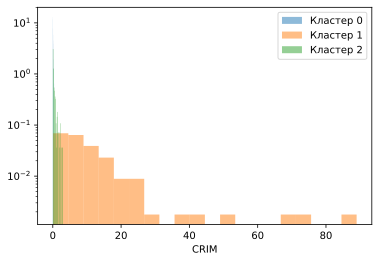

In [120]:
# Гистограмма для параметра CRIM тренировочной выборки
draw_hist(X_train, 'CRIM', labels_train, True)

Из полученных данных видно, что в кластере 0 самые высокие цены на недвижимость и наименьший уровень CRIM.

### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [121]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора
labels_test = kmeans.predict(X_test_scaled)

In [122]:
# Выведем полученные значения
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [123]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных
for idx in range(3):
    mean_price = y_test.loc[labels_test == idx, 'price'].mean()
    mean_crim = X_test.loc[labels_test == idx, 'CRIM'].mean()
    print(f'Кластер {idx}:\tprice = {mean_price},\tCRIM = {mean_crim}')

Кластер 0:	price = 31.35,	CRIM = 0.06206
Кластер 1:	price = 16.43714285714286,	CRIM = 10.165531142857143
Кластер 2:	price = 21.860784313725492,	CRIM = 0.2660788235294118


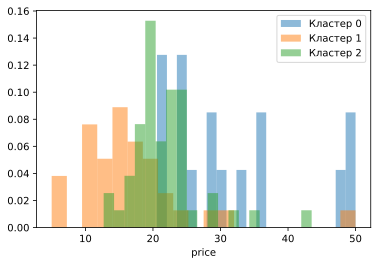

In [124]:
# Гистограмма для параметра price тестовой выборки
draw_hist(y_test, 'price', labels_test)

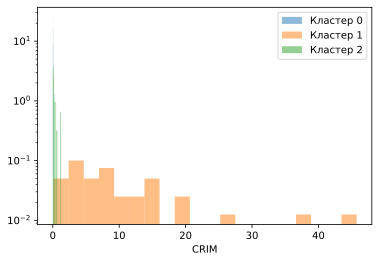

In [125]:
# Гистограмма для параметра price тестовой выборки
draw_hist(X_test, 'CRIM', labels_test, True)

Для тестовой выборки можно сделать те же выводы, что были получены для тренировочной выборки.